In [1]:
# pip3 -U install keras

In [2]:
import pandas as pd
import numpy as np
import os
np.random.seed(3)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', 
                     data_home=os.path.join(os.environ["HOME"],"datasets"))

In [4]:
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [5]:
enc = OneHotEncoder()
onehot_target = enc.fit_transform( mnist.target.reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(scale(mnist.data),
                                                    onehot_target,
                                                    test_size=0.5, random_state=3)

/Users/dlituiev/repos/scikit-learn/sklearn/utils/validation.py:424: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
import keras
# keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

batch_size = 128 #Number of images used in each optimization step
nb_classes = 10 #One class per digit
nb_epoch = 5 #Number of times the whole data is used to learn

# dropout = 0.2
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(512, input_dim=784, init='uniform', activation='relu',
                W_regularizer='l1l2'))
model.add(Dense(512, init='uniform', activation='relu',
                W_regularizer='l1l2'
                ))
model.add(Dense(10, init='uniform', activation='softmax'))

sgd = SGD(lr=.01, decay=1e-6, momentum=0.9, nesterov=True)
# rms = RMSprop()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [8]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.tr_loss = []
        self.tr_acc = []
#         self.val_loss = []
#         self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.tr_loss.append(logs.get('loss'))
        self.tr_acc.append(logs.get('acc'))
#         self.val_loss.append(logs.get('val_loss'))
#         self.val_acc.append(logs.get('val_acc'))
#         print(logs)
#         raise Exception
#         assert (logs.get('val_loss')) is not None

In [9]:
# history = LossHistory()
mo = model.fit(X_train, y_train,
          nb_epoch=nb_epoch,
          batch_size=batch_size,
          validation_data=(X_test, y_test),)

#           callbacks=[history]

score = model.evaluate(X_test, y_test, batch_size=batch_size)

Train on 35000 samples, validate on 35000 samples
Epoch 1/5
35000/35000 [==============================] - 7s - loss: 17.4592 - acc: 0.1853 - val_loss: 2.3016 - val_acc: 0.1117
Epoch 2/5
35000/35000 [==============================] - 6s - loss: 2.8906 - acc: 0.1133 - val_loss: 2.3019 - val_acc: 0.1117
Epoch 3/5
35000/35000 [==============================] - 6s - loss: 2.8902 - acc: 0.1133 - val_loss: 2.3016 - val_acc: 0.1117
Epoch 4/5
35000/35000 [==============================] - 6s - loss: 2.8898 - acc: 0.1133 - val_loss: 2.3018 - val_acc: 0.1117
Epoch 5/5
34944/35000 [============================>.] - ETA: 0s

In [ ]:
# mo.history
# history.__dict__

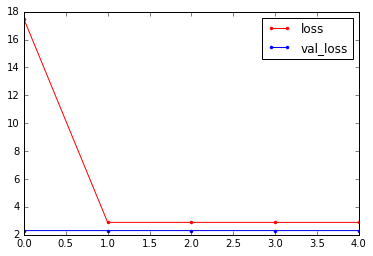

In [10]:
import  matplotlib.pyplot as plt
%matplotlib inline
keys = ["loss", "val_loss"]
colors = ["r","b"]
for key,cc in zip(keys, colors):
    plt.plot(mo.history[key], c=cc, label=key, marker=".")
#     plt.plot(mo.history[key], c="r")
plt.legend()

In [ ]:
import  matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.tr_loss, c="b")
# plt.plot(history.val_loss, c="r")